In [1]:
# Willy Esquivel-Lopez G01127937
import numpy as np
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt
import re
import scipy
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

from sklearn import tree, metrics
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree#, export_graphviz
from sklearn.ensemble import BaggingClassifier


from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report

#from sklearn.externals.six import StringIO  

from IPython.display import Image  
import pydotplus
import graphviz
plt.rcParams['figure.figsize'] = 10,7


In [2]:
df = pd.read_csv('data/Train_Data.csv')

In [3]:
df.head(15)

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,credit
0,0,13,40,1,1,2174,0,4,7,9,White,Male,0
1,1,13,13,0,4,0,0,2,6,9,White,Male,0
2,2,9,40,1,6,0,0,0,4,11,White,Male,0
3,3,7,40,0,6,0,0,2,4,1,Black,Male,0
4,4,13,40,5,10,0,0,2,4,9,Black,Female,0
5,5,14,40,5,4,0,0,2,4,12,White,Female,0
6,6,5,16,1,8,0,0,3,4,6,Black,Female,0
7,7,9,45,0,4,0,0,2,6,11,White,Male,1
8,8,14,50,1,10,14084,0,4,4,12,White,Female,1
9,9,13,40,0,4,5178,0,2,4,9,White,Male,1


In [4]:
#get some info on the data size and types
df.shape
df.info()
# Turns out F10 and F11 are objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      32561 non-null  int64 
 1   F1      32561 non-null  int64 
 2   F2      32561 non-null  int64 
 3   F3      32561 non-null  int64 
 4   F4      32561 non-null  int64 
 5   F5      32561 non-null  int64 
 6   F6      32561 non-null  int64 
 7   F7      32561 non-null  int64 
 8   F8      32561 non-null  int64 
 9   F9      32561 non-null  int64 
 10  F10     32561 non-null  object
 11  F11     32561 non-null  object
 12  credit  32561 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 3.2+ MB


C:\Users\willa\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


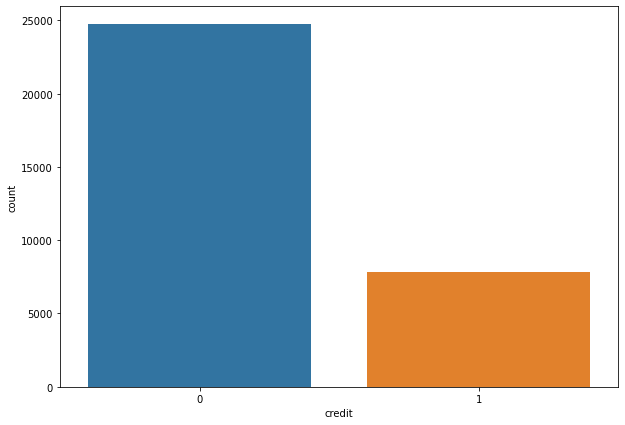

In [5]:
# check the balance for the Credit column
sns.countplot(df.credit)  
plt.show()  

C:\Users\willa\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


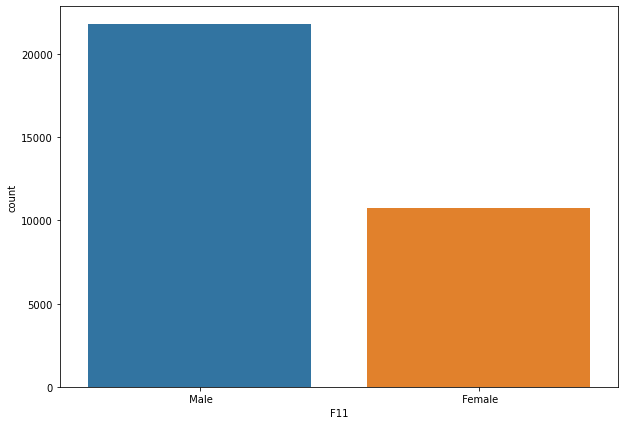

In [6]:
# Here I will make quick analasys to understand the data better
#F1 - Continuous value describing number of years since last degree was completed 
#F2 - Continuous value indicating hours worked per week 3 - Categorical Value 
#F4 - Categorical Value indicating type of occupation 
#F5 - continuous value denoting gains 
#F6 - continuous value denoting loss 
#F7 - Categorical value denoting marital status 
#F8 - Categorical value denoting type of employment (e.g., Self) 
#F9 - Categorical Value denoting education type 
#F10 - Categorical Value denoting different race 
#F11 - Categorical - Female/Male

## gender diffs
sns.countplot(df.F11)  
plt.show()  

C:\Users\willa\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


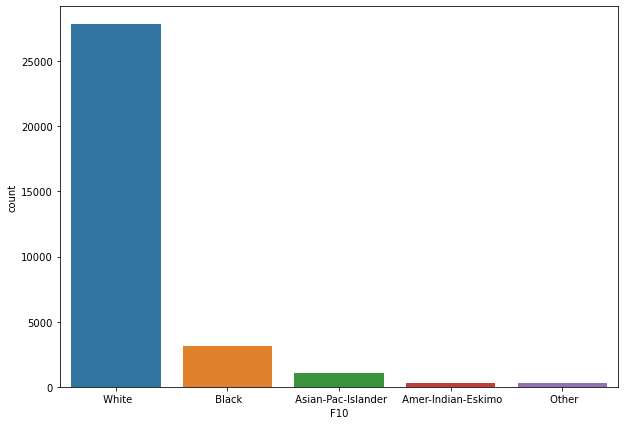

In [7]:
## race diffs
sns.countplot(df.F10)  
plt.show()  

In [8]:
# after looking at some of the categorical values we will need to type convert them to work with continuis values
df['F10'],_ = pd.factorize(df['F10'])
df['F11'],_ = pd.factorize(df['F11'])
df.head(15)

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,credit
0,0,13,40,1,1,2174,0,4,7,9,0,0,0
1,1,13,13,0,4,0,0,2,6,9,0,0,0
2,2,9,40,1,6,0,0,0,4,11,0,0,0
3,3,7,40,0,6,0,0,2,4,1,1,0,0
4,4,13,40,5,10,0,0,2,4,9,1,1,0
5,5,14,40,5,4,0,0,2,4,12,0,1,0
6,6,5,16,1,8,0,0,3,4,6,1,1,0
7,7,9,45,0,4,0,0,2,6,11,0,0,1
8,8,14,50,1,10,14084,0,4,4,12,0,1,1
9,9,13,40,0,4,5178,0,2,4,9,0,0,1


C:\Users\willa\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


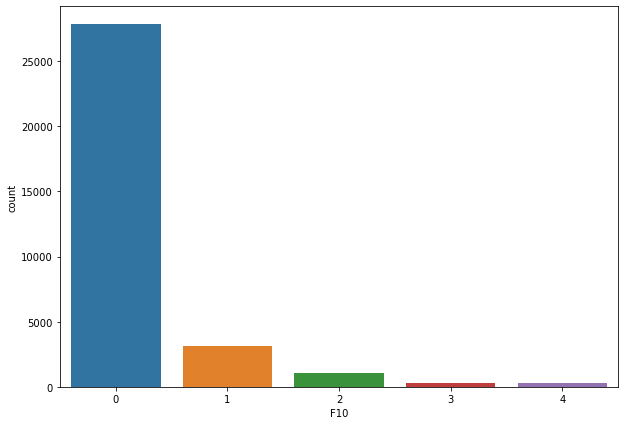

C:\Users\willa\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


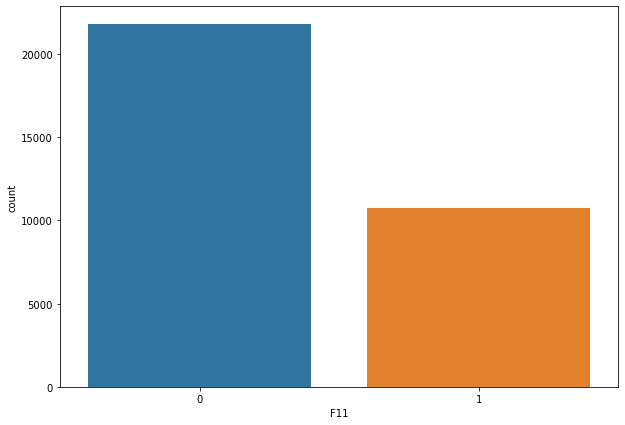

In [9]:
## race diffs
sns.countplot(df.F10)  
plt.show()  
## gender diffs
sns.countplot(df.F11)  
plt.show()  

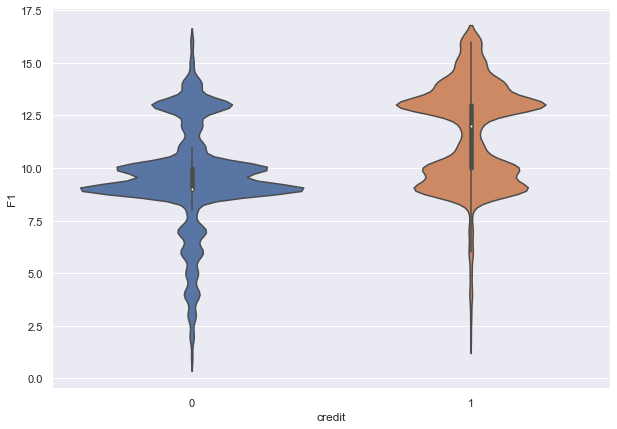

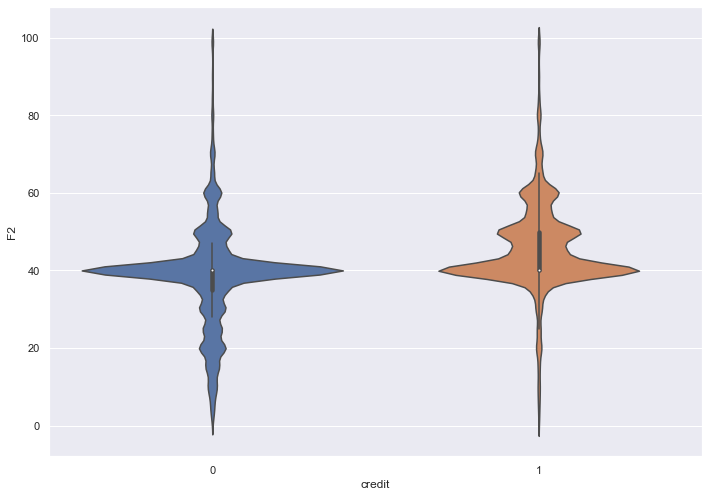

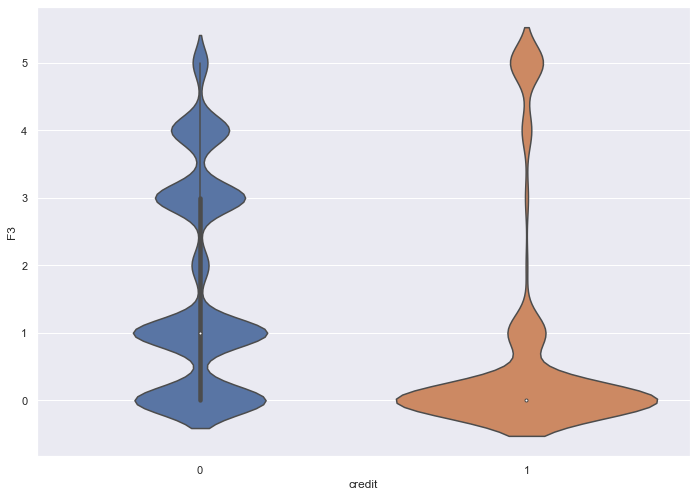

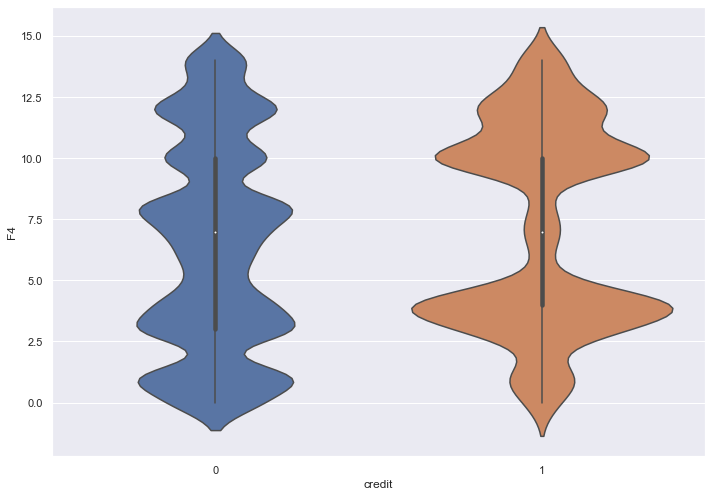

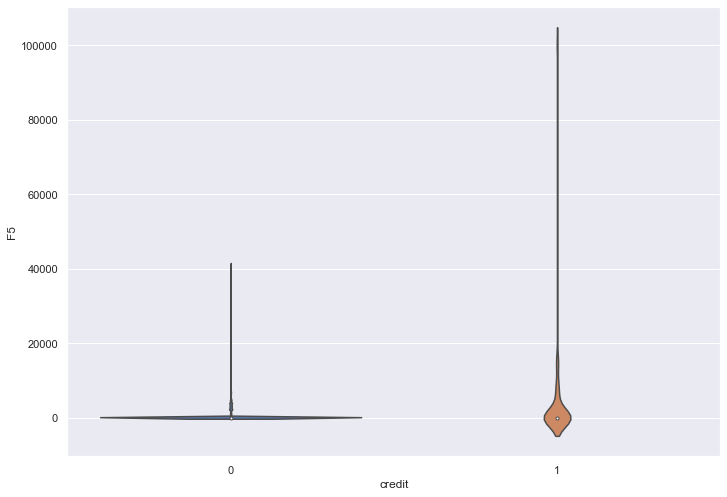

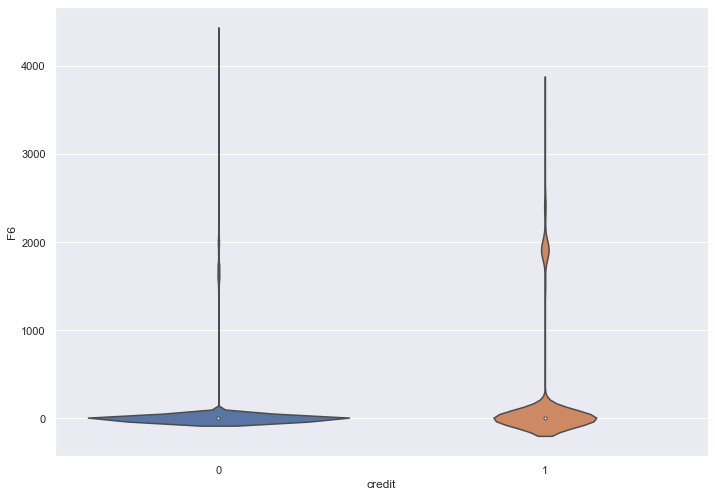

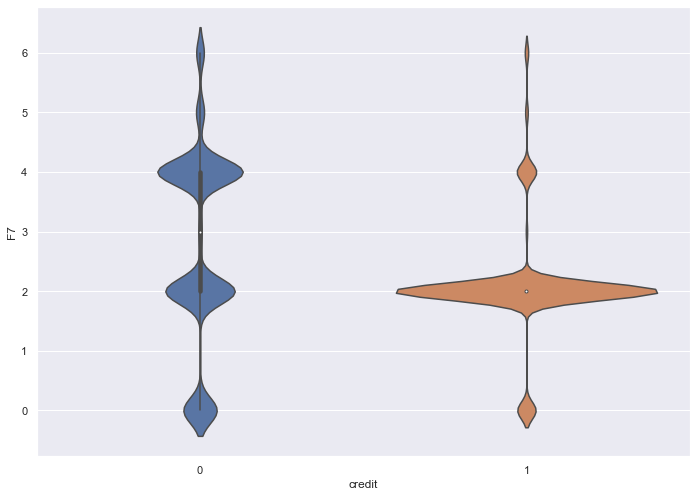

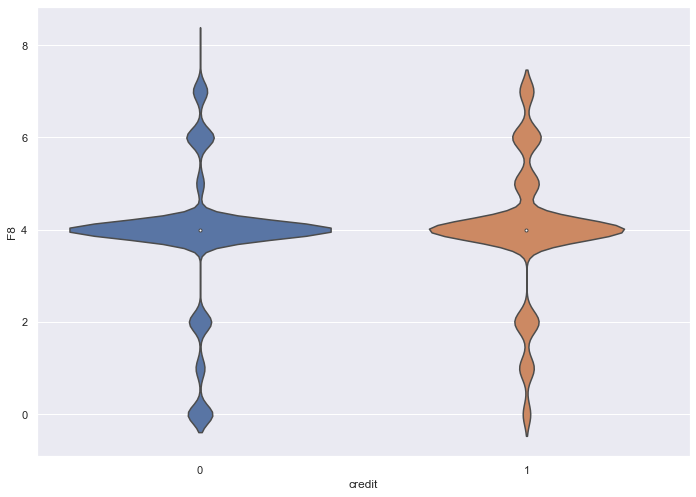

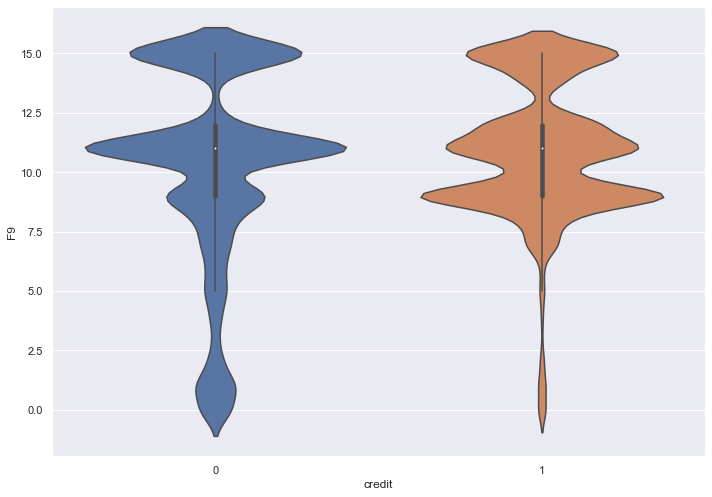

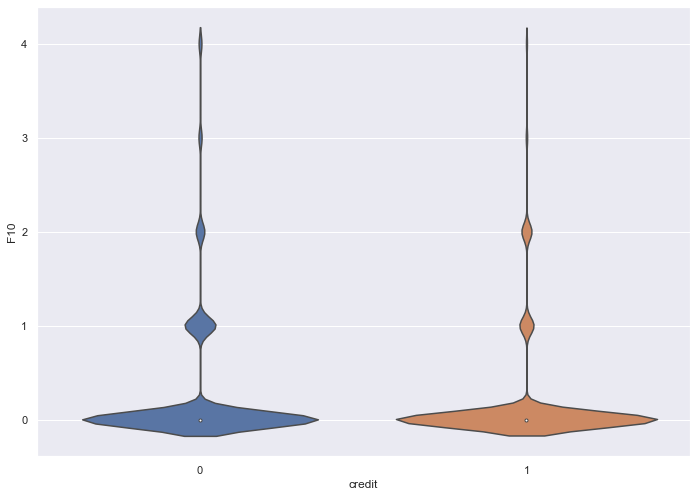

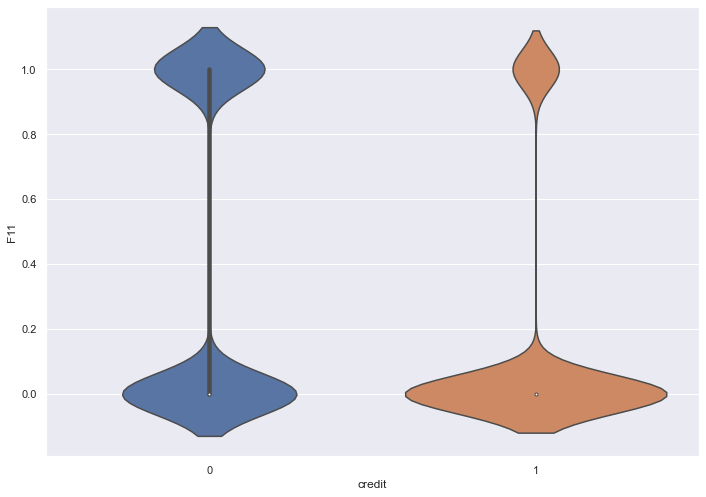

In [10]:
# to see the distribution of each feature for comparison
# where x is the target and y are the features
def violin_plots(x, y, df):
    for i, col in enumerate(y):
        plt.figure(i)
        sns.set(rc={'figure.figsize':(11.7,8.27)})
        ax = sns.violinplot(x=x, y=col, data=df)
# all the features
y = df.columns[1:-1]
# the target value (credit)
x = df.columns[-1]
        
violin_plots(x, y, df)

In [11]:
# Here I will perform the test train split
feature_cols = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11']
X = df[feature_cols] # Features 
y = df.credit # Target variable
# train 70% test 30% split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
# Here I will be trining and fitting the decision tree model
d_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [13]:
# Here I use the model to make predictions with the Test data
y_pred = d_tree.predict(X_test)
#Lets check how the model perform on the predictions made
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Accuracy: 0.8514689323369843
Misclassified samples: 1451


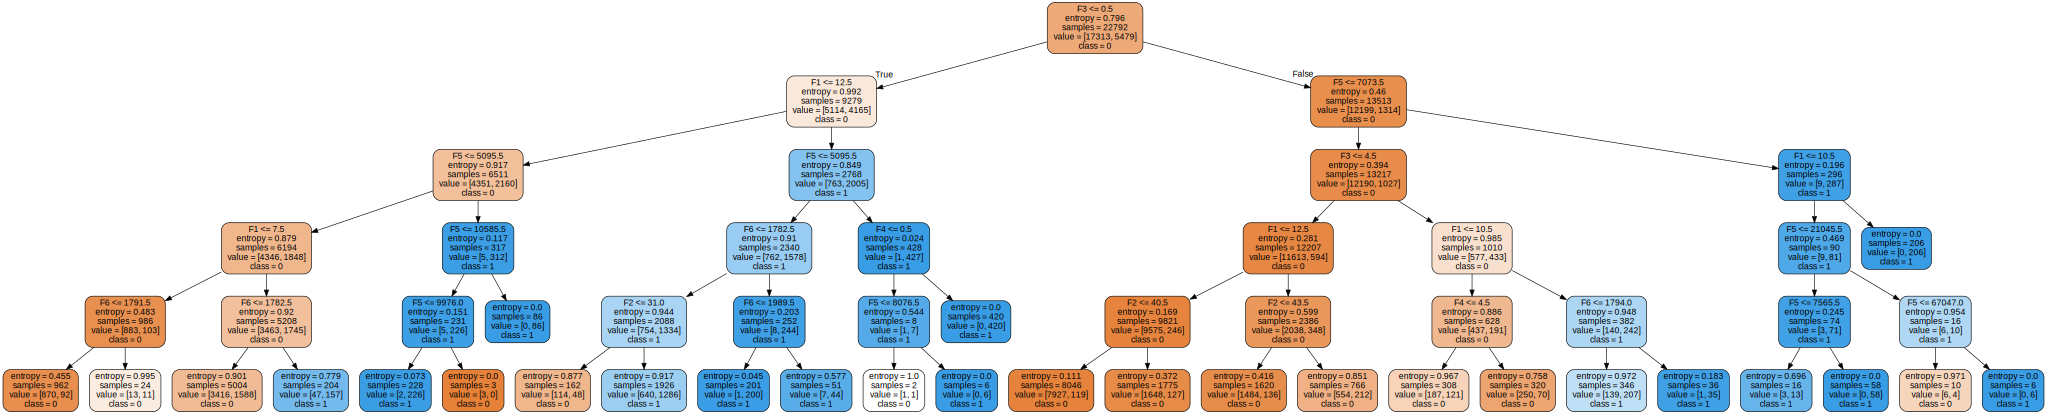

In [14]:
# Lets visualize the decision tree
feature_names = X.columns
dot_data = tree.export_graphviz(d_tree, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=['0','1'])
graph = graphviz.Source(dot_data)  
graph

In [15]:
# I will check for overfitting and underfitting
print('the training set score: {:.4f}'.format(d_tree.score(X_train, y_train)))
print('the test set score: {:.4f}'.format(d_tree.score(X_test, y_test)))

the training set score: 0.8522
the test set score: 0.8515


In [16]:
# the decision tree above is not bad, lets see if we can improve it.
# since the violin plos above depicted some scttered data across a feew features we will make the model more complex by making the depth = 5

In [17]:
# Here I will be trining and fitting the decision tree model using entropy information gain node splitting and maxdepth 7 
d_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)

In [18]:
# Here I use the model to make predictions with the Test data
y_pred = d_tree.predict(X_test)
#Lets check how the model perform on the predictions made
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Accuracy: 0.8556658818712253
Misclassified samples: 1410


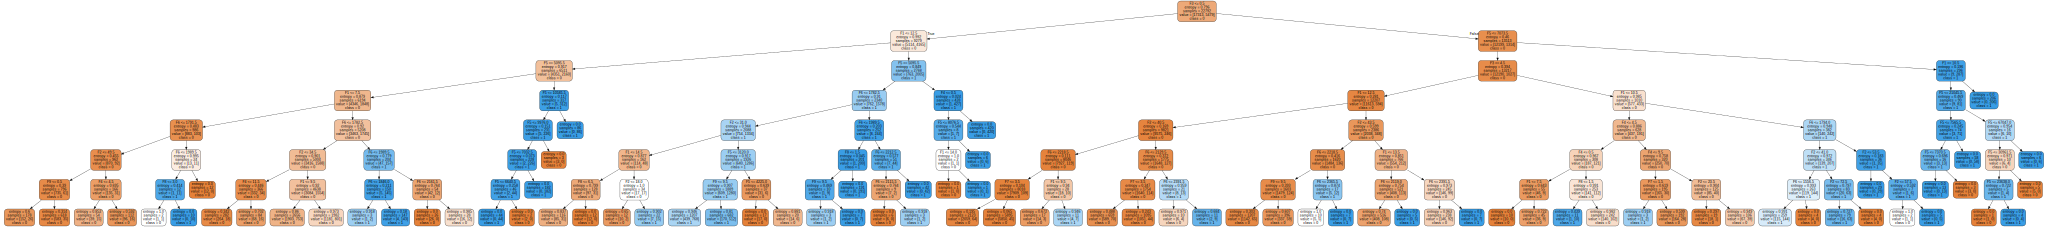

In [19]:
# Lets visualize the decision tree
feature_names = X.columns
dot_data = tree.export_graphviz(d_tree, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=['0','1'])
graph = graphviz.Source(dot_data)  
graph

In [20]:
# this model looks to do pretty well, atleast an imporovement. So I will check for overfitting and underfitting
print('the training set score: {:.4f}'.format(d_tree.score(X_train, y_train)))
print('the test set score: {:.4f}'.format(d_tree.score(X_test, y_test)))

the training set score: 0.8582
the test set score: 0.8557


In [21]:
# NOW for the Gini Index Criterion

In [22]:
# I will keep the split at 70-30 as it has the best outcomes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# I will now use the Gini index for impurity measure criterion
d_tree = tree.DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=0)
d_tree.fit(X_train, y_train)


# Here I use the model to make predictions with the Test data
y_pred = d_tree.predict(X_test)
#Lets check how the model perform on the predictions made
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Accuracy: 0.8546422356433616
Misclassified samples: 1420


In [23]:
# It appears we have no improvement from Entropy using Gini index instead of information gain,
# thus our best model is the 70-30 split with a d_tree using Entropy information gain with a decision tree of max depth = 7

In [24]:
# I will keep the split at 70-30 as it has the best outcomes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Here I will be trining and fitting the decision tree model using entropy information gain node splitting and maxdepth 7 
d_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)

In [25]:
# Here I use the model to make predictions with the Test data
y_pred = d_tree.predict(X_test)
# I will now check thoroughly the performance of my most accurate model predictor most importantly the F1 Score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7407
           1       0.79      0.55      0.65      2362

    accuracy                           0.86      9769
   macro avg       0.83      0.75      0.78      9769
weighted avg       0.85      0.86      0.85      9769



In [26]:
# now that I have a model chosen I will use it to run predictions on the test data
#test_df = pd.read_csv('data/Test_Data.csv')
#get some info on the data size and types
#test_df.shape
#test_df.info()
# Turns out F10 and F11 are objects

In [27]:
# I will also need to type convert F10 and F11 to work with continuis values
#test_df['F10'],_ = pd.factorize(test_df['F10'])
#test_df['F11'],_ = pd.factorize(test_df['F11'])
#test_df.head(15)

In [28]:
#X_test = test_df[feature_cols]

In [29]:
#test_df['credit'] = d_tree.predict(X_test)
#test_df.head(15)

In [30]:
#test_df['credit']

In [31]:
#np.savetxt(r'Data/output.txt',test_df['credit'],fmt='%d')

In [32]:
# Submitting the results of using this model resulted in a 62%, lets see what we can improve

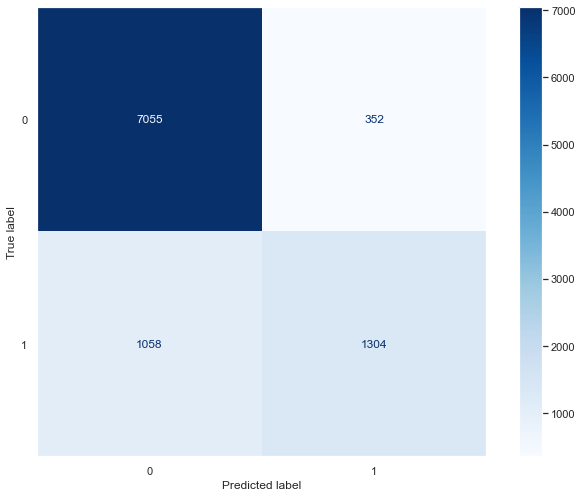

In [33]:
# I will keep the split at 70-30 as it has the best outcomes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Here I will be trining and fitting the decision tree model using entropy information gain node splitting and maxdepth 7 
d_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)
d_tree.fit(X_train, y_train)
# now to see the over fitting and under fitting of True Positives (TP),True Negatives (TN), False Positives (FP), and False Negatives (FN)
plot_confusion_matrix(d_tree, X_test, y_test, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

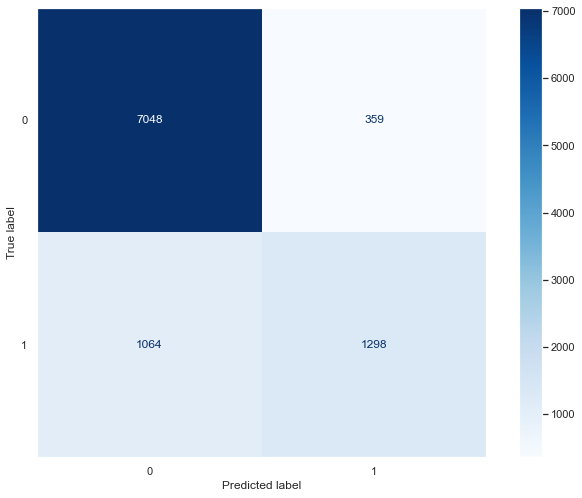

In [34]:
# There appears to be a large number of false Negatives so lets see wht happens if i specify the min sample split 
# I will keep the split at 70-30 as it has the best outcomes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Here I will be trining and fitting the decision tree model using entropy information gain node splitting and maxdepth 7 
d_tree = tree.DecisionTreeClassifier( criterion='entropy', max_depth=9, random_state=0)
d_tree.fit(X_train, y_train)
# now to see the over fitting and under fitting of True Positives (TP),True Negatives (TN), False Positives (FP), and False Negatives (FN)
plot_confusion_matrix(d_tree, X_test, y_test, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

In [35]:
# Here I use the model to make predictions with the Test data
y_pred = d_tree.predict(X_test)
# I will now check thoroughly the performance of my most accurate model predictor most importantly the F1 Score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7407
           1       0.78      0.55      0.65      2362

    accuracy                           0.85      9769
   macro avg       0.83      0.75      0.78      9769
weighted avg       0.85      0.85      0.84      9769



In [36]:
# Now using Bagging
# I will keep the split at 70-30 as it has the best outcomes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)
# Here I will be trining and fitting the decision tree model using entropy information gain node splitting and maxdepth 7 
d_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=17)
d_tree.fit(X_train, y_train)
# I will initiate a bagging classifier in effort to improve the performance of my model
bc = BaggingClassifier(base_estimator=d_tree, n_estimators=300, random_state=5)

In [37]:
# Fit the bagging classifier to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

In [38]:
# I will now check thoroughly the performance of my most accurate model predictor most importantly the F1 Score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      7389
           1       0.80      0.55      0.65      2380

    accuracy                           0.86      9769
   macro avg       0.83      0.75      0.78      9769
weighted avg       0.85      0.86      0.85      9769



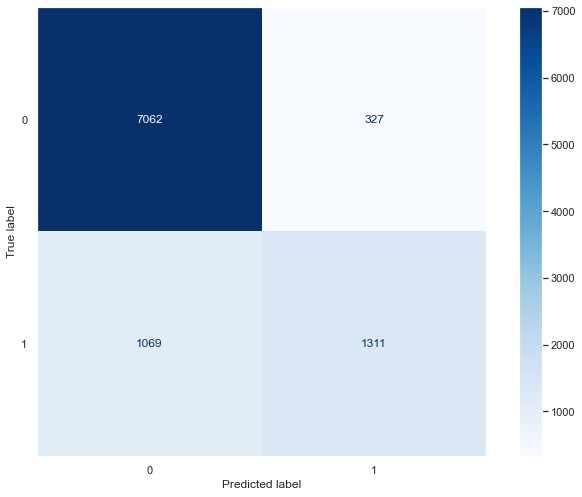

In [39]:
# now to see the over fitting and under fitting of True Positives (TP),True Negatives (TN), False Positives (FP), and False Negatives (FN)
plot_confusion_matrix(bc, X_test, y_test, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

In [40]:
# witht this slightly better outcome, lets use it on the test data...
test_df = pd.read_csv('data/Test_Data.csv')
test_df['F10'],_ = pd.factorize(test_df['F10'])
test_df['F11'],_ = pd.factorize(test_df['F11'])
test_df.head(15)
X_test = test_df[feature_cols]
X_test

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11
0,7,40,3,7,0,0,4,4,1,0,0
1,12,40,0,11,0,0,2,2,7,1,0
2,10,40,0,7,7688,0,2,4,15,0,0
3,10,30,3,0,0,0,4,0,15,1,1
4,6,30,1,8,0,0,4,4,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
13300,13,40,3,10,0,0,4,4,9,1,0
13301,13,36,1,10,0,0,0,4,9,1,1
13302,9,40,2,0,0,0,6,0,11,0,0
13303,13,50,0,10,0,0,2,4,9,1,0


In [41]:
test_df['credit'] = bc.predict(X_test)
test_df.head(15)

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,credit
0,0,7,40,3,7,0,0,4,4,1,0,0,0
1,1,12,40,0,11,0,0,2,2,7,1,0,0
2,2,10,40,0,7,7688,0,2,4,15,0,0,1
3,3,10,30,3,0,0,0,4,0,15,1,1,0
4,4,6,30,1,8,0,0,4,4,0,1,0,0
5,5,9,40,4,0,0,0,4,0,11,0,0,0
6,6,15,32,0,10,3103,0,2,6,14,1,0,1
7,7,10,40,4,8,0,0,4,4,15,1,1,0
8,8,4,10,0,3,0,0,2,4,5,1,0,0
9,9,9,40,0,7,6418,0,2,4,11,1,0,1


In [42]:
test_df['credit']

0        0
1        0
2        1
3        0
4        0
        ..
13300    0
13301    0
13302    0
13303    1
13304    0
Name: credit, Length: 13305, dtype: int64

In [43]:
np.savetxt(r'Data/bc_output.txt',test_df['credit'],fmt='%d')